In [1]:
import numpy as np
import pandas as pd
import random
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
try:
  import shap
except:
  !pip install shap
  import shap
  print('shap installed')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 33.6 MB/s eta 0:00:00
shap installed


In [5]:
df = pd.read_csv('Smartphone_Responses.csv')

df.head()

,Timestamp,เพศของผู้ตอบแบบสอบถาม,ช่วงอายุของผู้ตอบแบบสอบถาม,อาชีพของผู้ตอบแบบสอบถาม,ช่วงเงินเดือนของผู้ตอบแบบสอบถาม,ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด,ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นเกม],ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นโซเชี่ยลมีเดีย],ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ดูหนัง ฟังเพลง],ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ถ่ายรูป ถ่ายวิดีโอ],หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด,จากข้อที่แล้ว เนื่องจากสาเหตุใด
0,1/13/2024 14:41:25,หญิง,21-25 ปี,เอกชน,"40,001-50,000 บาท",IOS,บ่อยครั้ง,บ่อยที่สุด,ปานกลาง,ค่อนข้างน้อย,Iphone,ดูรวยดีย์
1,1/13/2024 15:01:08,ชาย,26-30 ปี,เอกชน,"30,001-40,000 บาท",IOS,ค่อนข้างน้อย,บ่อยที่สุด,ปานกลาง,ปานกลาง,Iphone,ความเสถียร
2,1/13/2024 15:01:44,ชาย,31-35 ปี,เอกชน,"40,001-50,000 บาท",IOS,น้อยที่สุด,ปานกลาง,ปานกลาง,น้อยที่สุด,Iphone,คุ้นเคยกับ Brand เดิม
3,1/13/2024 15:01:48,ชาย,21-25 ปี,เอกชน,"30,001-40,000 บาท",IOS,น้อยที่สุด,ปานกลาง,ปานกลาง,น้อยที่สุด,Iphone,ง่ายต่อการใช้งาน
4,1/13/2024 15:01:49,ชาย,21-25 ปี,ว่างงาน,"น้อยกว่า 20,000 บาท",IOS,ปานกลาง,บ่อยครั้ง,ค่อนข้างน้อย,ค่อนข้างน้อย,Iphone,ดี ทน


In [6]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Columns to encode
columns_to_encode = ['ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นเกม]','ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นโซเชี่ยลมีเดีย]','ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ดูหนัง ฟังเพลง]','ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ถ่ายรูป ถ่ายวิดีโอ]']

# Apply LabelEncoder to each column
for column in columns_to_encode:
    df[column + '_encoded'] = label_encoder.fit_transform(df[column])


In [7]:
df

,Timestamp,เพศของผู้ตอบแบบสอบถาม,ช่วงอายุของผู้ตอบแบบสอบถาม,อาชีพของผู้ตอบแบบสอบถาม,ช่วงเงินเดือนของผู้ตอบแบบสอบถาม,ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด,ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นเกม],ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นโซเชี่ยลมีเดีย],ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ดูหนัง ฟังเพลง],ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ถ่ายรูป ถ่ายวิดีโอ],หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด,จากข้อที่แล้ว เนื่องจากสาเหตุใด,ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นเกม]_encoded,ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นโซเชี่ยลมีเดีย]_encoded,ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ดูหนัง ฟังเพลง]_encoded,ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ถ่ายรูป ถ่ายวิดีโอ]_encoded
0,1/13/2024 14:41:25,หญิง,21-25 ปี,เอกชน,"40,001-50,000 บาท",IOS,บ่อยครั้ง,บ่อยที่สุด,ปานกลาง,ค่อนข้างน้อย,Iphone,ดูรวยดีย์,2,3,4,0
1,1/13/2024 15:01:08,ชาย,26-30 ปี,เอกชน,"30,001-40,000 บาท",IOS,ค่อนข้างน้อย,บ่อยที่สุด,ปานกลาง,ปานกลาง,Iphone,ความเสถียร,0,3,4,4
2,1/13/2024 15:01:44,ชาย,31-35 ปี,เอกชน,"40,001-50,000 บาท",IOS,น้อยที่สุด,ปานกลาง,ปานกลาง,น้อยที่สุด,Iphone,คุ้นเคยกับ Brand เดิม,1,4,4,1
3,1/13/2024 15:01:48,ชาย,21-25 ปี,เอกชน,"30,001-40,000 บาท",IOS,น้อยที่สุด,ปานกลาง,ปานกลาง,น้อยที่สุด,Iphone,ง่ายต่อการใช้งาน,1,4,4,1
4,1/13/2024 15:01:49,ชาย,21-25 ปี,ว่างงาน,"น้อยกว่า 20,000 บาท",IOS,ปานกลาง,บ่อยครั้ง,ค่อนข้างน้อย,ค่อนข้างน้อย,Iphone,ดี ทน,4,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,8/17/2024 15:07:39,หญิง,26-30 ปี,เอกชน,"30,001-40,000 บาท",Android,ปานกลาง,บ่อยที่สุด,ค่อนข้างน้อย,บ่อยครั้ง,Google,เป็นแบรนด์ที่น่าสนใจ,4,3,0,2
65,8/17/2024 15:08:53,ชาย,31-35 ปี,เอกชน,"มากกว่า 60,000 บาท",IOS,ปานกลาง,บ่อยครั้ง,ปานกลาง,ปานกลาง,Iphone,เพราะรู้สึกยุ่งยากในการย้ายข้อมูลส่วนตัว เเละ ...,4,2,4,4
66,8/17/2024 15:09:15,หญิง,21-25 ปี,นักศึกษา,"น้อยกว่า 20,000 บาท",Android,น้อยที่สุด,บ่อยที่สุด,บ่อยครั้ง,ปานกลาง,Samsung,ฟังก์ชั่นใหม่น่าใช้ และคุ้นเคยที่สุด,1,3,2,4
67,8/17/2024 15:24:35,ชาย,26-30 ปี,เอกชน,"40,001-50,000 บาท",IOS,ค่อนข้างน้อย,บ่อยครั้ง,ปานกลาง,บ่อยที่สุด,Iphone,Ecosystem ดี,0,2,4,3


In [8]:
unique_values = df.apply(lambda col: col.unique())

# Print unique values for each column
for column in unique_values.index:
    print(f"Unique values in '{column}': {unique_values[column]}")

Unique values in 'Timestamp': ['1/13/2024 14:41:25' '1/13/2024 15:01:08' '1/13/2024 15:01:44'
 '1/13/2024 15:01:48' '1/13/2024 15:01:49' '1/13/2024 15:01:51'
 '1/13/2024 15:01:52' '1/13/2024 15:01:53' '1/13/2024 15:01:57'
 '1/13/2024 15:01:59' '1/13/2024 15:02:02' '1/13/2024 15:02:08'
 '1/13/2024 15:02:10' '1/13/2024 15:02:12' '1/13/2024 15:02:13'
 '1/13/2024 15:02:17' '1/13/2024 15:02:18' '1/13/2024 15:02:26'
 '1/13/2024 15:02:27' '1/13/2024 15:02:35' '1/13/2024 15:02:36'
 '1/13/2024 15:02:46' '1/13/2024 15:02:49' '1/13/2024 15:03:29'
 '1/13/2024 15:03:52' '1/13/2024 15:03:55' '1/13/2024 15:03:57'
 '1/13/2024 15:04:00' '1/13/2024 15:04:34' '1/13/2024 15:04:50'
 '1/13/2024 15:05:03' '1/13/2024 15:05:45' '1/13/2024 15:05:55'
 '1/13/2024 15:06:02' '8/17/2024 15:02:26' '8/17/2024 15:02:54'
 '8/17/2024 15:02:56' '8/17/2024 15:03:03' '8/17/2024 15:03:10'
 '8/17/2024 15:03:33' '8/17/2024 15:03:45' '8/17/2024 15:03:46'
 '8/17/2024 15:03:52' '8/17/2024 15:03:57' '8/17/2024 15:04:00'
 '8/17/202

In [9]:
df = df[df['ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด'] != 'IOS และ Andriod']
df

,Timestamp,เพศของผู้ตอบแบบสอบถาม,ช่วงอายุของผู้ตอบแบบสอบถาม,อาชีพของผู้ตอบแบบสอบถาม,ช่วงเงินเดือนของผู้ตอบแบบสอบถาม,ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด,ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นเกม],ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นโซเชี่ยลมีเดีย],ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ดูหนัง ฟังเพลง],ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ถ่ายรูป ถ่ายวิดีโอ],หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด,จากข้อที่แล้ว เนื่องจากสาเหตุใด,ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นเกม]_encoded,ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นโซเชี่ยลมีเดีย]_encoded,ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ดูหนัง ฟังเพลง]_encoded,ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ถ่ายรูป ถ่ายวิดีโอ]_encoded
0,1/13/2024 14:41:25,หญิง,21-25 ปี,เอกชน,"40,001-50,000 บาท",IOS,บ่อยครั้ง,บ่อยที่สุด,ปานกลาง,ค่อนข้างน้อย,Iphone,ดูรวยดีย์,2,3,4,0
1,1/13/2024 15:01:08,ชาย,26-30 ปี,เอกชน,"30,001-40,000 บาท",IOS,ค่อนข้างน้อย,บ่อยที่สุด,ปานกลาง,ปานกลาง,Iphone,ความเสถียร,0,3,4,4
2,1/13/2024 15:01:44,ชาย,31-35 ปี,เอกชน,"40,001-50,000 บาท",IOS,น้อยที่สุด,ปานกลาง,ปานกลาง,น้อยที่สุด,Iphone,คุ้นเคยกับ Brand เดิม,1,4,4,1
3,1/13/2024 15:01:48,ชาย,21-25 ปี,เอกชน,"30,001-40,000 บาท",IOS,น้อยที่สุด,ปานกลาง,ปานกลาง,น้อยที่สุด,Iphone,ง่ายต่อการใช้งาน,1,4,4,1
4,1/13/2024 15:01:49,ชาย,21-25 ปี,ว่างงาน,"น้อยกว่า 20,000 บาท",IOS,ปานกลาง,บ่อยครั้ง,ค่อนข้างน้อย,ค่อนข้างน้อย,Iphone,ดี ทน,4,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,8/17/2024 15:07:39,หญิง,26-30 ปี,เอกชน,"30,001-40,000 บาท",Android,ปานกลาง,บ่อยที่สุด,ค่อนข้างน้อย,บ่อยครั้ง,Google,เป็นแบรนด์ที่น่าสนใจ,4,3,0,2
65,8/17/2024 15:08:53,ชาย,31-35 ปี,เอกชน,"มากกว่า 60,000 บาท",IOS,ปานกลาง,บ่อยครั้ง,ปานกลาง,ปานกลาง,Iphone,เพราะรู้สึกยุ่งยากในการย้ายข้อมูลส่วนตัว เเละ ...,4,2,4,4
66,8/17/2024 15:09:15,หญิง,21-25 ปี,นักศึกษา,"น้อยกว่า 20,000 บาท",Android,น้อยที่สุด,บ่อยที่สุด,บ่อยครั้ง,ปานกลาง,Samsung,ฟังก์ชั่นใหม่น่าใช้ และคุ้นเคยที่สุด,1,3,2,4
67,8/17/2024 15:24:35,ชาย,26-30 ปี,เอกชน,"40,001-50,000 บาท",IOS,ค่อนข้างน้อย,บ่อยครั้ง,ปานกลาง,บ่อยที่สุด,Iphone,Ecosystem ดี,0,2,4,3


    'หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด_Google':'Google'
    'หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด_Iphone'
    'หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด_Nokia'
    'หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด_Oneplus'
    'หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด_Oppo'
    'หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด_Samsung'
    'หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด_ยังไม่รู้

In [10]:
# Define mappings for each column

age_mapping = {
    '21-25 ปี':1,
    '26-30 ปี':2,
    '31-35 ปี':3,
    '36-40 ปี':4,
}
salary_mapping = {
    'น้อยกว่า 20,000 บาท':1,
    '20,001-30,000 บาท':2,
    '30,001-40,000 บาท':3,
    '40,001-50,000 บาท':4,
    '50,001-60,000 บาท':5,
    'มากกว่า 60,000 บาท':5,
}
tel_mapping = {
    'IOS':1,
    'Android':2,
}

new_phone = {
    'Iphone':'IOS',
    'Samsung':'Android',
    'Oneplus':'Android',
    'Oppo':'Android',
    'Google':'Android',
    'ยังไม่รู้':'Not_sure',
    'Nokia':'Android'
}

# Apply mappings to the DataFrame
df['Age_encoded'] = df['ช่วงอายุของผู้ตอบแบบสอบถาม'].map(age_mapping)
df['Salary_encoded'] = df['ช่วงเงินเดือนของผู้ตอบแบบสอบถาม'].map(salary_mapping)
df['Tel_encoded'] = df['ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด'].map(tel_mapping)
df['new_phone'] = df['หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด'].map(new_phone)

df.sample(10)

,Timestamp,เพศของผู้ตอบแบบสอบถาม,ช่วงอายุของผู้ตอบแบบสอบถาม,อาชีพของผู้ตอบแบบสอบถาม,ช่วงเงินเดือนของผู้ตอบแบบสอบถาม,ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด,ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นเกม],ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นโซเชี่ยลมีเดีย],ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ดูหนัง ฟังเพลง],ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ถ่ายรูป ถ่ายวิดีโอ],หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด,จากข้อที่แล้ว เนื่องจากสาเหตุใด,ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นเกม]_encoded,ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นโซเชี่ยลมีเดีย]_encoded,ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ดูหนัง ฟังเพลง]_encoded,ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ถ่ายรูป ถ่ายวิดีโอ]_encoded,Age_encoded,Salary_encoded,Tel_encoded,new_phone
58,8/17/2024 15:04:55,หญิง,31-35 ปี,เอกชน,"50,001-60,000 บาท",IOS,น้อยที่สุด,บ่อยที่สุด,บ่อยครั้ง,ปานกลาง,ยังไม่รู้,ยังคิดไม่ออก,1,3,2,4,3,5,1,Not_sure
30,1/13/2024 15:04:34,ชาย,26-30 ปี,เอกชน,"50,001-60,000 บาท",IOS,น้อยที่สุด,บ่อยครั้ง,บ่อยครั้ง,ค่อนข้างน้อย,Iphone,ไหลลื่น ชินกับระบบ,1,2,2,0,2,5,1,IOS
4,1/13/2024 15:01:49,ชาย,21-25 ปี,ว่างงาน,"น้อยกว่า 20,000 บาท",IOS,ปานกลาง,บ่อยครั้ง,ค่อนข้างน้อย,ค่อนข้างน้อย,Iphone,ดี ทน,4,2,0,0,1,1,1,IOS
57,8/17/2024 15:04:49,หญิง,26-30 ปี,รัฐวิสาหกิจ,"30,001-40,000 บาท",IOS,น้อยที่สุด,บ่อยครั้ง,บ่อยที่สุด,ค่อนข้างน้อย,Iphone,ระบบมีความปลอดภัย design ทันสมัย,1,2,3,0,2,3,1,IOS
11,1/13/2024 15:02:02,หญิง,26-30 ปี,นักศึกษา,"น้อยกว่า 20,000 บาท",IOS,ค่อนข้างน้อย,บ่อยที่สุด,บ่อยครั้ง,บ่อยครั้ง,Iphone,ชอบและเคยชินกับระบบ,0,3,2,2,2,1,1,IOS
37,8/17/2024 15:02:54,หญิง,26-30 ปี,เอกชน,"มากกว่า 60,000 บาท",IOS,น้อยที่สุด,บ่อยที่สุด,ปานกลาง,ปานกลาง,Iphone,ความเคยชิน,1,3,4,4,2,5,1,IOS
50,8/17/2024 15:04:15,หญิง,21-25 ปี,เอกชน,"30,001-40,000 บาท",Android,น้อยที่สุด,บ่อยที่สุด,ค่อนข้างน้อย,บ่อยที่สุด,Samsung,กล้องสวย,1,3,0,3,1,3,2,Android
21,1/13/2024 15:02:36,ชาย,26-30 ปี,เอกชน,"30,001-40,000 บาท",Android,น้อยที่สุด,ปานกลาง,ค่อนข้างน้อย,บ่อยครั้ง,Oneplus,อยากลองยี่ห้อใหม่ ๆ (ที่ไม่เคยใช้),1,4,0,2,2,3,2,Android
43,8/17/2024 15:03:46,หญิง,31-35 ปี,นักศึกษา,"น้อยกว่า 20,000 บาท",Android,น้อยที่สุด,ค่อนข้างน้อย,บ่อยครั้ง,บ่อยครั้ง,Oppo,ราคาถูก,1,0,2,2,3,1,2,Android
54,8/17/2024 15:04:25,หญิง,21-25 ปี,เอกชน,"20,001-30,000 บาท",IOS,น้อยที่สุด,บ่อยที่สุด,บ่อยครั้ง,ปานกลาง,Iphone,เคยชินกับระบบของios,1,3,2,4,1,2,1,IOS


ONEHOT

In [11]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False)  # Set sparse=False to get a dense array

# Fit and transform the data
encoded_array = encoder.fit_transform(df[['อาชีพของผู้ตอบแบบสอบถาม','เพศของผู้ตอบแบบสอบถาม','new_phone']])

# Convert the result to a DataFrame for better visualization
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['อาชีพของผู้ตอบแบบสอบถาม','เพศของผู้ตอบแบบสอบถาม','new_phone']))
df = pd.concat([df.drop(['อาชีพของผู้ตอบแบบสอบถาม','เพศของผู้ตอบแบบสอบถาม','new_phone'], axis=1), encoded_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 28 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Timestamp                                                          69 non-null     object 
 1   ช่วงอายุของผู้ตอบแบบสอบถาม                                         69 non-null     object 
 2   ช่วงเงินเดือนของผู้ตอบแบบสอบถาม                                    69 non-null     object 
 3   ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด                           69 non-null     object 
 4   ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นเกม]                     69 non-null     object 
 5   ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นโซเชี่ยลมีเดีย]          69 non-null     object 
 6   ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ดูหนัง ฟังเพลง]              69 non-null     object 
 7   ท่านใช้สมาร์ทโฟนในการทำอะไรม

In [13]:
column_rename ={
    'เพศของผู้ตอบแบบสอบถาม_encoded':'Gender',
    'ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นเกม]_encoded':'Game',
    'ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นโซเชี่ยลมีเดีย]_encoded':'SocialMedia',
    'ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ดูหนัง ฟังเพลง]_encoded':'Song',
    'ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ถ่ายรูป ถ่ายวิดีโอ]_encoded':'Camera',
    'หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด_encoded':'new_phone',
    'Age_encoded':'Age',
    'เพศของผู้ตอบแบบสอบถาม_ชาย':'Male',
    'เพศของผู้ตอบแบบสอบถาม_หญิง':'Female',
    'Salary_encoded':'Salary',
    'อาชีพของผู้ตอบแบบสอบถาม_Freelancer':'Freelance',
    'อาชีพของผู้ตอบแบบสอบถาม_นักศึกษา':'Student',
    'อาชีพของผู้ตอบแบบสอบถาม_ข้าราชการ':'Goverment_Officer',
    'อาชีพของผู้ตอบแบบสอบถาม_รัฐวิสาหกิจ':'State_Enterprise',
    'อาชีพของผู้ตอบแบบสอบถาม_ว่างงาน':'Unemployed',
    'อาชีพของผู้ตอบแบบสอบถาม_เอกชน':'Private_Company',

}
df = df.rename(columns = column_rename)
df

,Timestamp,ช่วงอายุของผู้ตอบแบบสอบถาม,ช่วงเงินเดือนของผู้ตอบแบบสอบถาม,ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด,ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นเกม],ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นโซเชี่ยลมีเดีย],ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ดูหนัง ฟังเพลง],ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ถ่ายรูป ถ่ายวิดีโอ],หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด,จากข้อที่แล้ว เนื่องจากสาเหตุใด,...,Goverment_Officer,Student,State_Enterprise,Unemployed,Private_Company,Male,Female,new_phone_Android,new_phone_IOS,new_phone_Not_sure
0,1/13/2024 14:41:25,21-25 ปี,"40,001-50,000 บาท",IOS,บ่อยครั้ง,บ่อยที่สุด,ปานกลาง,ค่อนข้างน้อย,Iphone,ดูรวยดีย์,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1/13/2024 15:01:08,26-30 ปี,"30,001-40,000 บาท",IOS,ค่อนข้างน้อย,บ่อยที่สุด,ปานกลาง,ปานกลาง,Iphone,ความเสถียร,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,1/13/2024 15:01:44,31-35 ปี,"40,001-50,000 บาท",IOS,น้อยที่สุด,ปานกลาง,ปานกลาง,น้อยที่สุด,Iphone,คุ้นเคยกับ Brand เดิม,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,1/13/2024 15:01:48,21-25 ปี,"30,001-40,000 บาท",IOS,น้อยที่สุด,ปานกลาง,ปานกลาง,น้อยที่สุด,Iphone,ง่ายต่อการใช้งาน,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,1/13/2024 15:01:49,21-25 ปี,"น้อยกว่า 20,000 บาท",IOS,ปานกลาง,บ่อยครั้ง,ค่อนข้างน้อย,ค่อนข้างน้อย,Iphone,ดี ทน,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,8/17/2024 15:07:39,26-30 ปี,"30,001-40,000 บาท",Android,ปานกลาง,บ่อยที่สุด,ค่อนข้างน้อย,บ่อยครั้ง,Google,เป็นแบรนด์ที่น่าสนใจ,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
65,8/17/2024 15:08:53,31-35 ปี,"มากกว่า 60,000 บาท",IOS,ปานกลาง,บ่อยครั้ง,ปานกลาง,ปานกลาง,Iphone,เพราะรู้สึกยุ่งยากในการย้ายข้อมูลส่วนตัว เเละ ...,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
66,8/17/2024 15:09:15,21-25 ปี,"น้อยกว่า 20,000 บาท",Android,น้อยที่สุด,บ่อยที่สุด,บ่อยครั้ง,ปานกลาง,Samsung,ฟังก์ชั่นใหม่น่าใช้ และคุ้นเคยที่สุด,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
67,8/17/2024 15:24:35,26-30 ปี,"40,001-50,000 บาท",IOS,ค่อนข้างน้อย,บ่อยครั้ง,ปานกลาง,บ่อยที่สุด,Iphone,Ecosystem ดี,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 28 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Timestamp                                                        69 non-null     object 
 1   ช่วงอายุของผู้ตอบแบบสอบถาม                                       69 non-null     object 
 2   ช่วงเงินเดือนของผู้ตอบแบบสอบถาม                                  69 non-null     object 
 3   ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด                         69 non-null     object 
 4   ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นเกม]                   69 non-null     object 
 5   ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นโซเชี่ยลมีเดีย]        69 non-null     object 
 6   ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ดูหนัง ฟังเพลง]            69 non-null     object 
 7   ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ถ่ายรูป 

In [15]:
dataY = df.dropna()
y = dataY.Tel_encoded
data_features = [
    'Male',
    'Female',
    'Game',
    'SocialMedia',
    'Song',
    'Camera',
    'new_phone_Android',
    'new_phone_IOS',
    'new_phone_Not_sure',
    'Age',
    'Salary',
    'Freelance',
    'Student',
    'Goverment_Officer',
    'State_Enterprise',
    'Unemployed',
    'Private_Company'
]

In [16]:
df_test = dataY[data_features]
df_test

,Male,Female,Game,SocialMedia,Song,Camera,new_phone_Android,new_phone_IOS,new_phone_Not_sure,Age,Salary,Freelance,Student,Goverment_Officer,State_Enterprise,Unemployed,Private_Company
0,0.0,1.0,2,3,4,0,0.0,1.0,0.0,1,4,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0,3,4,4,0.0,1.0,0.0,2,3,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,1,4,4,1,0.0,1.0,0.0,3,4,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,1,4,4,1,0.0,1.0,0.0,1,3,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,4,2,0,0,0.0,1.0,0.0,1,1,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,0.0,1.0,4,3,0,2,1.0,0.0,0.0,2,3,0.0,0.0,0.0,0.0,0.0,1.0
65,1.0,0.0,4,2,4,4,0.0,1.0,0.0,3,5,0.0,0.0,0.0,0.0,0.0,1.0
66,0.0,1.0,1,3,2,4,1.0,0.0,0.0,1,1,0.0,1.0,0.0,0.0,0.0,0.0
67,1.0,0.0,0,2,4,3,0.0,1.0,0.0,2,4,0.0,0.0,0.0,0.0,0.0,1.0


In [17]:
y

,Tel_encoded
0,1
1,1
2,1
3,1
4,1
...,...
64,2
65,1
66,2
67,1


In [18]:
dataX = df[data_features]
X = dataX.dropna()
X

,Male,Female,Game,SocialMedia,Song,Camera,new_phone_Android,new_phone_IOS,new_phone_Not_sure,Age,Salary,Freelance,Student,Goverment_Officer,State_Enterprise,Unemployed,Private_Company
0,0.0,1.0,2,3,4,0,0.0,1.0,0.0,1,4,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0,3,4,4,0.0,1.0,0.0,2,3,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,1,4,4,1,0.0,1.0,0.0,3,4,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,1,4,4,1,0.0,1.0,0.0,1,3,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,4,2,0,0,0.0,1.0,0.0,1,1,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,0.0,1.0,4,3,0,2,1.0,0.0,0.0,2,3,0.0,0.0,0.0,0.0,0.0,1.0
65,1.0,0.0,4,2,4,4,0.0,1.0,0.0,3,5,0.0,0.0,0.0,0.0,0.0,1.0
66,0.0,1.0,1,3,2,4,1.0,0.0,0.0,1,1,0.0,1.0,0.0,0.0,0.0,0.0
67,1.0,0.0,0,2,4,3,0.0,1.0,0.0,2,4,0.0,0.0,0.0,0.0,0.0,1.0


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=98)


model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f'Y_TEST/Y_HAT')
print(f'{y_test},{y_pred}')
print(f'Accuracy: {acc:.3f}')

Y_TEST/Y_HAT
49    1
54    1
14    1
5     1
28    1
16    1
44    1
29    2
47    1
68    2
45    1
37    1
40    1
1     1
56    1
33    1
48    2
64    2
51    1
11    1
13    1
Name: Tel_encoded, dtype: int64,[1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 2 2 1 1 1]
Accuracy: 0.905


In [27]:
# Initialize the explainer
explainer = shap.Explainer(model, X_train)
#explainer = shap.KernelExplainer(model.predict_proba, X_train)
# Calculate SHAP values for the test set
shap_values = explainer(X_test)
#shap_values = explainer.shap_values(X_test)

In [28]:
print(shap_values)

.values =
array([[ 7.59848442e-02,  7.59609833e-02, -3.46840711e-01,
        -9.10331715e-02,  7.67091419e-02, -1.84631112e-01,
        -2.78904379e-01, -2.85634880e-01,  2.42673965e-03,
         1.77251906e-03, -1.73154448e-01,  9.30506360e-04,
         4.95153890e-03, -1.39633174e-02,  8.27940022e-03,
         1.79413720e-02,  1.60072696e-01],
       [ 7.59848442e-02,  7.59609833e-02, -3.46840711e-01,
        -9.10331715e-02, -5.47922442e-02, -4.00784609e-01,
        -2.78904379e-01, -2.85634880e-01,  2.42673965e-03,
         8.68534340e-02,  1.34675682e-01,  9.30506360e-04,
         4.95153890e-03, -1.39633174e-02,  8.27940022e-03,
         1.79413720e-02,  1.60072696e-01],
       [-5.42748887e-02, -5.42578452e-02,  1.73420355e-01,
        -9.10331715e-02, -5.47922442e-02, -4.00784609e-01,
        -2.78904379e-01, -2.85634880e-01,  2.42673965e-03,
         1.77251906e-03,  1.34675682e-01,  9.30506360e-04,
         4.95153890e-03, -1.39633174e-02,  8.27940022e-03,
         1.79413720

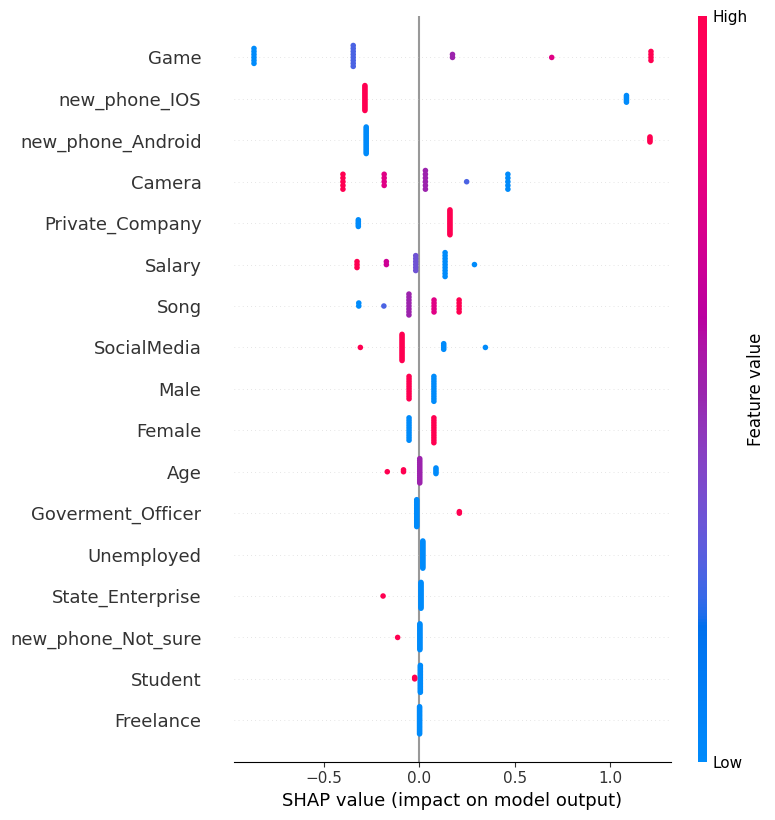

In [29]:
shap.summary_plot(shap_values, X_test)
#shap.summary_plot(shap_values[0], X_test)

In [30]:
random_sample = random.randint(1, len(X_test))

shap.initjs()
shap.plots.force(shap_values[random_sample])


Logistic Regression Feature Importance:
                Feature  Coefficient
6    new_phone_Android     1.381679
7        new_phone_IOS    -1.279724
16     Private_Company     0.681663
2                 Game     0.357637
5               Camera    -0.310301
10              Salary    -0.284728
14    State_Enterprise    -0.210344
3          SocialMedia    -0.210119
15          Unemployed    -0.178668
12             Student    -0.166041
4                 Song    -0.135321
1               Female    -0.130844
0                 Male     0.130772
13   Goverment_Officer    -0.126682
8   new_phone_Not_sure    -0.102028
9                  Age    -0.064881
11           Freelance     0.000000


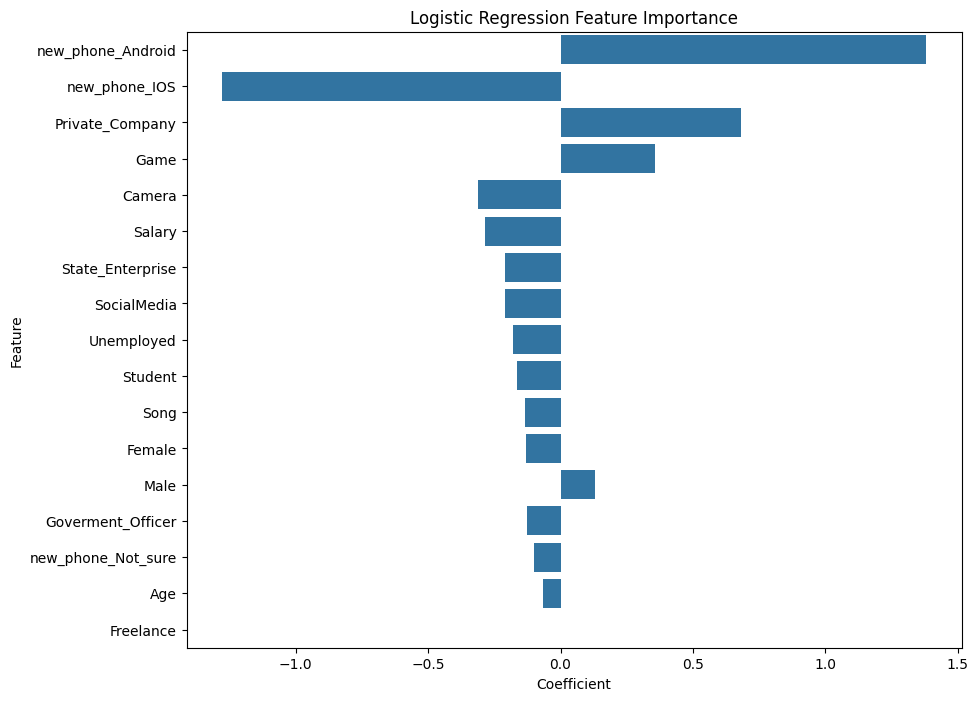

In [24]:
# Get model coefficients
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_[0]
})

# Sort by absolute value of the coefficients
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

print("\nLogistic Regression Feature Importance:\n", feature_importance[['Feature', 'Coefficient']])

# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Logistic Regression Feature Importance')
plt.show()
